**NOTE: In this assignment, you will use random_state=101 wherever appropriate.**

## Task 1: Kernel SVM

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn import datasets

In [3]:
# DO NOT MODIFY this cell, just run it!
def generate_dataset(num_samples, num_features):
    X, y = make_classification(n_samples=num_samples, n_features=num_features, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1, flip_y=0, class_sep=1.0, random_state=101)
    return X, y

Step 1: create a function named "visualize_dataset" that takes in X, y as arguments and visualizes them

Specify the appropriate xlabel, ylabel, legend (for classes), and title

(4 points)

In [4]:
### your code here
def visualize_dataset(X, y):
  for unique in np.unique(y):
    plt.scatter(X[unique==y, 0], X[unique==y, 1], label = f"Class {unique}")
  plt.xlabel("1")
  plt.ylabel("2")
  plt.title("Visualized Dataset")
  plt.legend()
  plt.show()


Below is a function to visualize the decision boundary

DO NOT MODIFY, it has been completed for you.

In [5]:
def plot_decision_boundary(X, y, ax, clf, gamma, title):
    h = .2  # Step size in the meshgrid

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', marker='o')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='x')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    # plt.show()


Step 2: (18 points)

Create three functions:

1.   **linear_kernel**
2.   **polynomial kernel**
3.   **rbf_kernel**

Use the below equations to return the appropriate results:

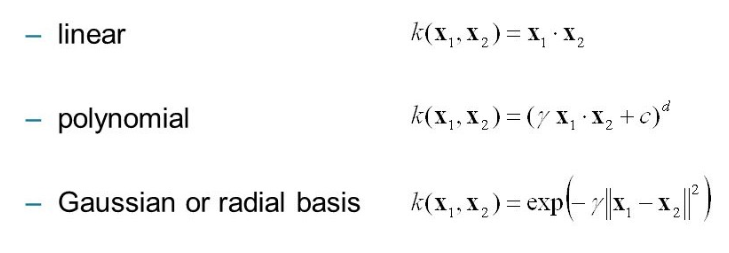



In [6]:
### your code here
def linear_kernel(x1, x2):
  return np.dot(x1, x2.T)

def polynomial_kernel(x1, x2, gamma, coef0, degree):
  return ((gamma*np.dot(x1, x2.T) + coef0) ** degree)

def rbf_kernel(x1, x2, gamma):
  dist_array = np.linalg.norm(x1[:, None, :] - x2[None, :, :], axis=-1)
  return np.exp((-1 * gamma) * np.square(dist_array))


Step 3:

Complete the below function "get_classifier" which should return a SVC classifier instance.

Handle the different cases for kernel ("linear, "poly", "rbf", "precomputed") and use the appropriate arguments for each kernel. **DON'T FORGET** to use random_state=101 when creating the model.

(12 points)

In [7]:
def get_classifier(kernel, C=1.0, gamma='scale', degree=3, coef0=0.0, random_state=101):

  ### your code here

  match kernel:

    case "linear" :
      return SVC(kernel = 'linear', C=C, random_state=random_state)

    case "poly" :
      return SVC(kernel = 'poly', C=C, gamma=gamma, degree=degree, coef0=coef0, random_state=random_state)

    case "rbf" :
      return SVC(kernel = 'rbf', C=C, gamma=gamma, random_state=random_state)

    case "precomputed" :
      return SVC(kernel = 'precomputed', C=C, random_state=random_state)
    case _ :
        return None



Do not modify the below cell, just run the code!

In [8]:
num_samples = 500
num_features = 2

X, y = generate_dataset(num_samples, num_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Call the visualize_dataset function (on the whole dataset) in the below cell

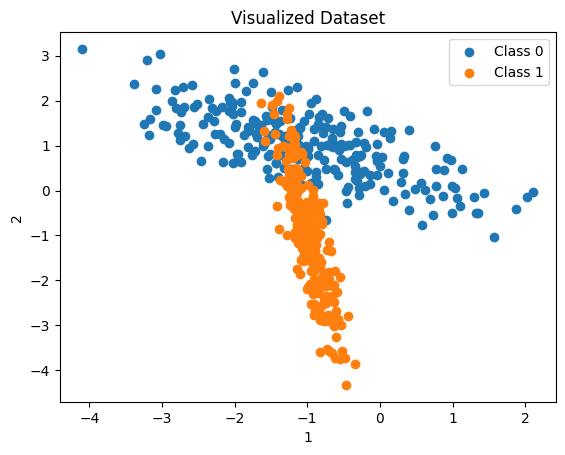

In [9]:
visualize_dataset(X,y)

Step 4: (18 points)

Compare the results from manually implemented kernels (linear, polynomial, RBF) with the scikit-learn implementation. Print the accuracy_score and confusion_matrix for both (manual and scikit-learn).

For Polynomial kernel use: degree=2, coef0=10 (called "constant" in the manual implementation), gamma=0.1

For RBF kernel use: gamma=100

**Hints:**

1.   The manually transformed features will have the shape (n_samples, n_samples)
2.   use "precomputed" as argument to the get_classifier function when fitting the manually transformed features





In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

### your code here
print("SKLEARN LINEAR")
skLearn = get_classifier(kernel = 'linear', random_state=101)
skLearn.fit(X_train, y_train)
skLearn_prediction = skLearn.predict(X_test)
skLearn_acc = accuracy_score(y_test,skLearn_prediction)
print(f"The Acc Score is {skLearn_acc}")
sk_confusion = confusion_matrix(y_test, skLearn_prediction)
print(f"The Confusion Matrix is \n {sk_confusion}")

print("\nMY LINEAR")
mine = get_classifier(kernel = "precomputed", random_state = 101)
Xtrain_lin = linear_kernel(X_train, X_train)
Xtest_lin = linear_kernel(X_test, X_train)
mine.fit(Xtrain_lin, y_train)
my_prediction = mine.predict(Xtest_lin)
my_acc = accuracy_score(y_test, my_prediction)
print(f"The Acc Score is {my_acc}")
my_confusion = confusion_matrix(y_test, my_prediction)
print(f"The Confusion Matrix is \n {my_confusion}")

SKLEARN LINEAR
The Acc Score is 0.8866666666666667
The Confusion Matrix is 
 [[70  4]
 [13 63]]

MY LINEAR
The Acc Score is 0.8866666666666667
The Confusion Matrix is 
 [[70  4]
 [13 63]]


In [11]:
### your code he
### your code here
print("SKLEARN POLY")
skLearn = get_classifier(kernel = 'poly', gamma=0.1, degree=2, coef0=10, random_state=101)
skLearn.fit(X_train, y_train)
skLearn_prediction = skLearn.predict(X_test)
skLearn_acc = accuracy_score(y_test,skLearn_prediction)
print(f"The Acc Score is {skLearn_acc}")
sk_confusion = confusion_matrix(y_test, skLearn_prediction)
print(f"The Confusion Matrix is \n {sk_confusion}")

print("\nMY POLY")
mine = get_classifier(kernel = "precomputed", random_state = 101)
Xtrain_poly = polynomial_kernel(X_train, X_train, gamma=0.1, degree=2, coef0=10)
Xtest_poly = polynomial_kernel(X_test, X_train, gamma=0.1, degree=2, coef0=10)
mine.fit(Xtrain_poly, y_train)
my_prediction = mine.predict(Xtest_poly)
my_acc = accuracy_score(y_test, my_prediction)
print(f"The Acc Score is {my_acc}")
my_confusion = confusion_matrix(y_test, my_prediction)
print(f"The Confusion Matrix is \n {my_confusion}")

SKLEARN POLY
The Acc Score is 0.9066666666666666
The Confusion Matrix is 
 [[71  3]
 [11 65]]

MY POLY
The Acc Score is 0.9066666666666666
The Confusion Matrix is 
 [[71  3]
 [11 65]]


In [12]:
### your code here

print("SKLEARN RBF")
skLearn = get_classifier(kernel = 'rbf', gamma=100, random_state=101)
skLearn.fit(X_train, y_train)
skLearn_prediction = skLearn.predict(X_test)
skLearn_acc = accuracy_score(y_test,skLearn_prediction)
print(f"The Acc Score is {skLearn_acc}")
sk_confusion = confusion_matrix(y_test, skLearn_prediction)
print(f"The Confusion Matrix is \n {sk_confusion}")

print("\nMY RBF")
mine = get_classifier(kernel = "precomputed", random_state = 101)
Xtrain_rbf = rbf_kernel(X_train, X_train, gamma=100)
Xtest_rbf = rbf_kernel(X_test, X_train, gamma=100)
mine.fit(Xtrain_rbf, y_train)
my_prediction = mine.predict(Xtest_rbf)
my_acc = accuracy_score(y_test, my_prediction)
print(f"The Acc Score is {my_acc}")
my_confusion = confusion_matrix(y_test, my_prediction)
print(f"The Confusion Matrix is \n {my_confusion}")

SKLEARN RBF
The Acc Score is 0.9133333333333333
The Confusion Matrix is 
 [[69  5]
 [ 8 68]]

MY RBF
The Acc Score is 0.9133333333333333
The Confusion Matrix is 
 [[69  5]
 [ 8 68]]


Step 5: Run the code cell below, observe the plots (make sure to scroll down as there are quite a number of plots), and answer the following questions. (keep your answer short)

1.   What is the major difference you notice between Linear and RBF kernels in terms of the decision boundary? (3 points)
2.  In general, what is the issue you observe when you using higher Gamma values? (3 points)

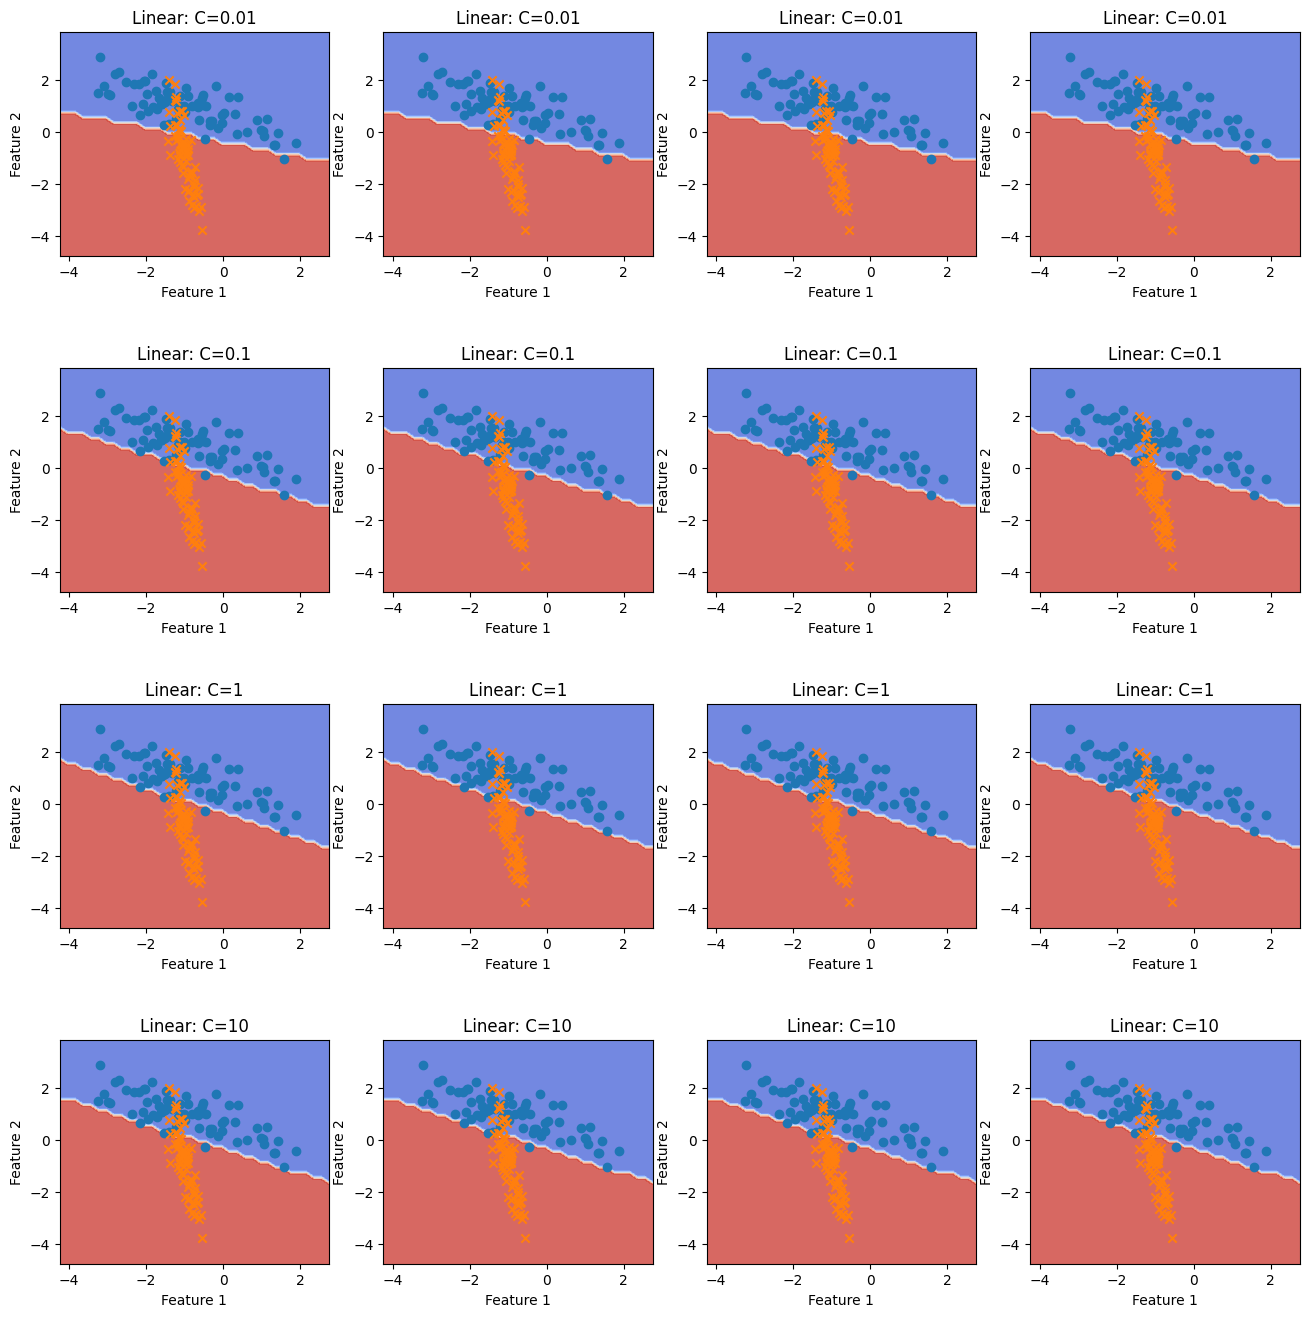

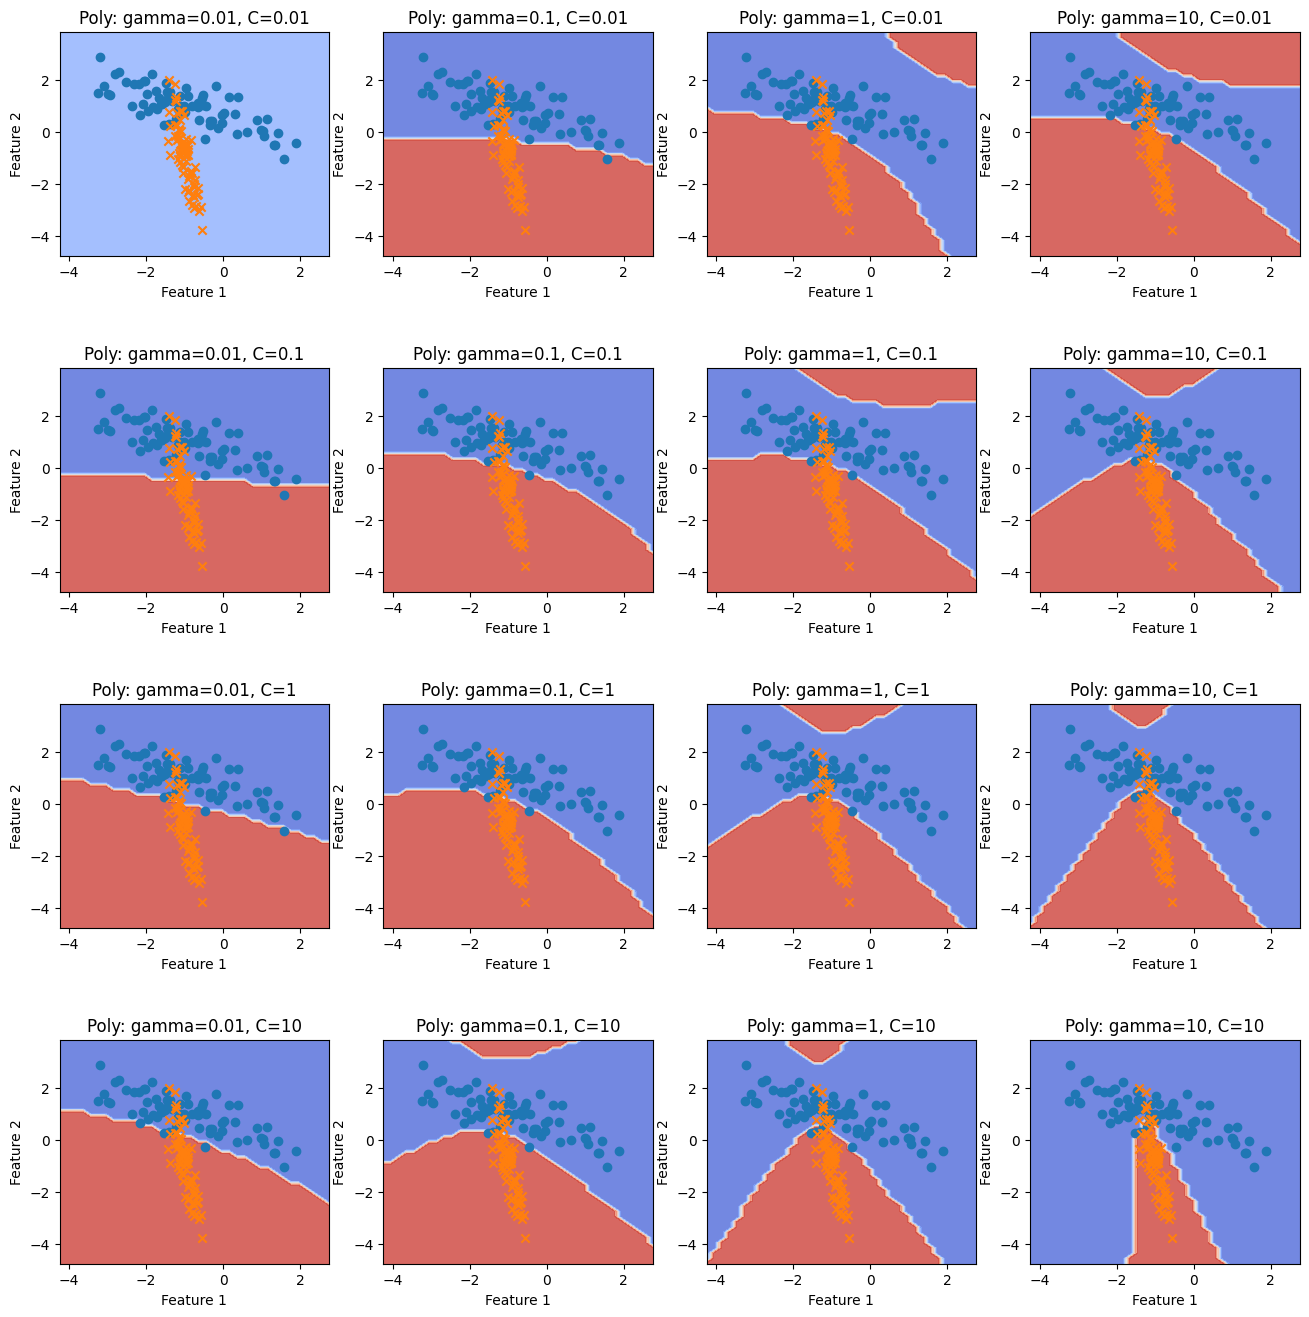

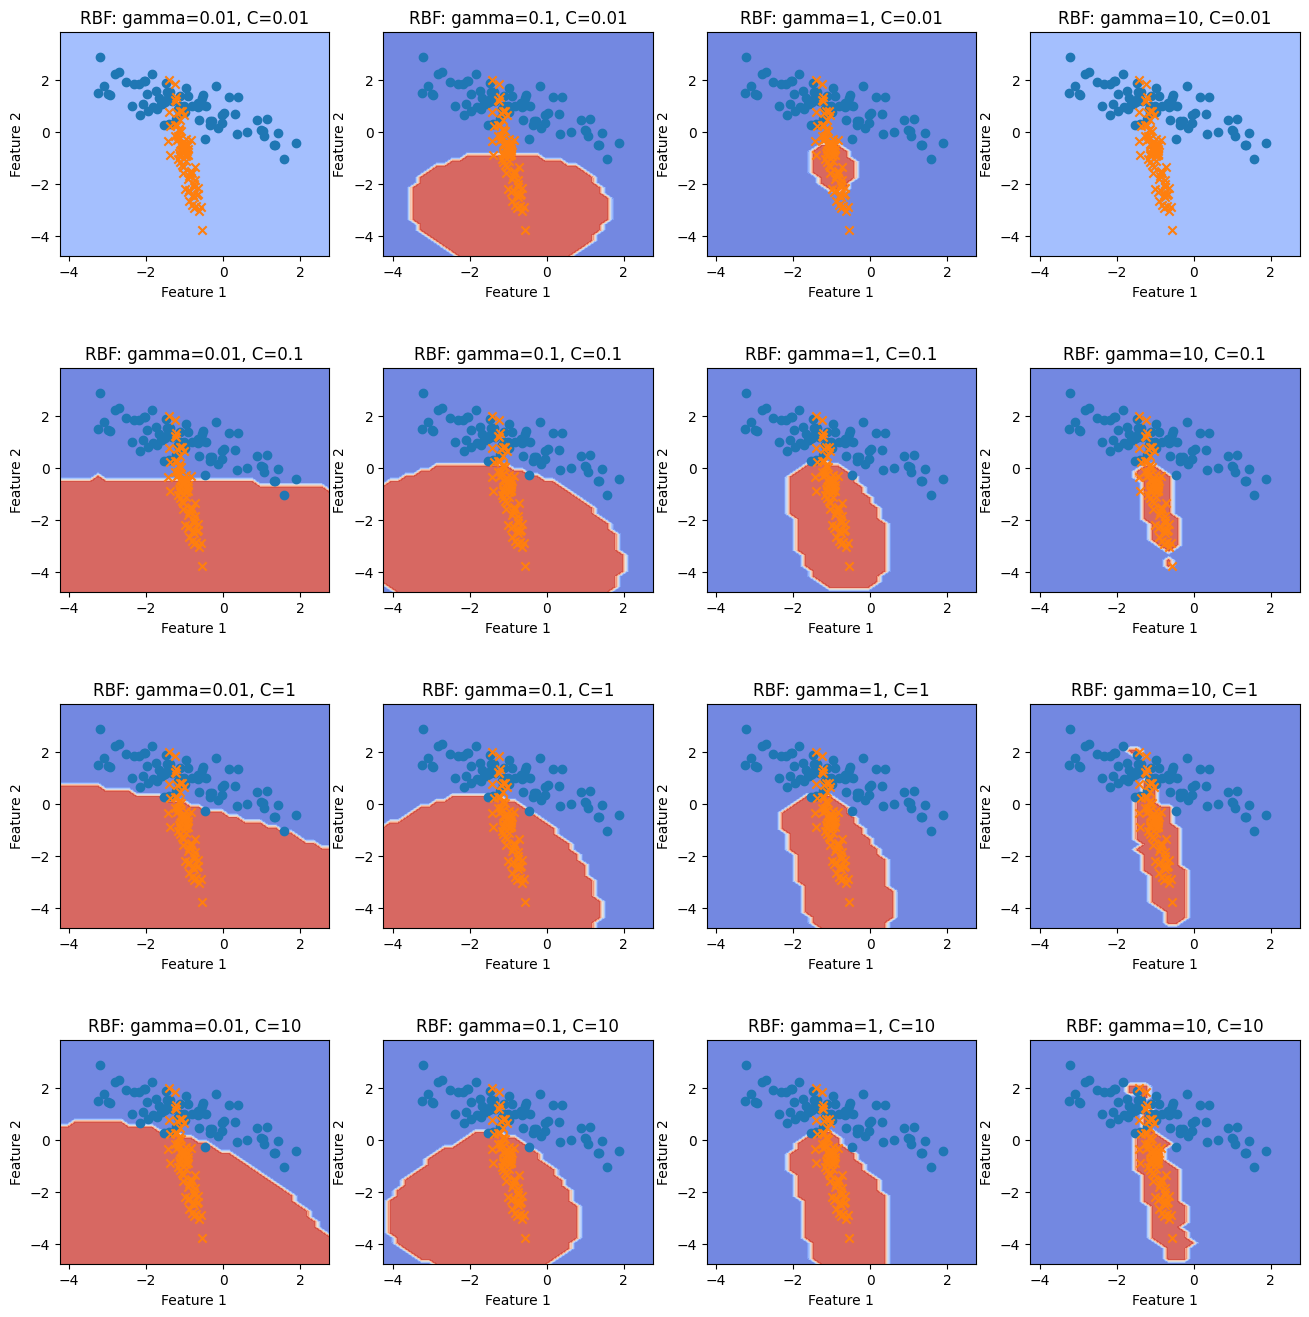

In [13]:
C_values = [0.01, 0.1, 1, 10]
gamma_values = [0.01, 0.1, 1, 10]

linear_fig, linear_ax = plt.subplots(nrows=len(C_values), ncols=len(gamma_values))
linear_fig.set_size_inches(16, 16)
plt.subplots_adjust(hspace=0.5)

poly_fig, poly_ax = plt.subplots(nrows=len(C_values), ncols=len(gamma_values))
poly_fig.set_size_inches(16, 16)
plt.subplots_adjust(hspace=0.5)

rbf_fig, rbf_ax = plt.subplots(nrows=len(C_values), ncols=len(gamma_values))
rbf_fig.set_size_inches(16, 16)
plt.subplots_adjust(hspace=0.5)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        clf_linear = get_classifier('linear', C)
        clf_polynomial = get_classifier('poly', C, gamma=gamma, degree=2, coef0=1)
        clf_rbf = get_classifier('rbf', C, gamma=gamma)

        # Train the models on the training set
        clf_linear.fit(X_train, y_train)
        clf_polynomial.fit(X_train, y_train)
        clf_rbf.fit(X_train, y_train)

        curr_linear_ax = linear_ax[i][j]
        curr_polynomial_ax = poly_ax[i][j]
        curr_rbf_ax = rbf_ax[i][j]

        # Plot decision boundaries on the testing set
        plot_decision_boundary(X_test, y_test, curr_linear_ax, clf_linear, gamma, f'Linear: C={C}')
        plot_decision_boundary(X_test, y_test, curr_polynomial_ax, clf_polynomial, gamma, f'Poly: gamma={gamma}, C={C}')
        plot_decision_boundary(X_test, y_test, curr_rbf_ax, clf_rbf, gamma, f'RBF: gamma={gamma}, C={C}')

In [14]:
"""
Answer to question 1:
"""
print("The decision boundary on the RBF seem a bit more sparatic than the linear. The linear deceison boundary for the linear is a bit more consistant and stable.")

"""
Answer to question 2:
"""
print("The graph begins to overfit on the data set as the gamma value rises. ")


The decision boundary on the RBF seem a bit more sparatic than the linear. The linear deceison boundary for the linear is a bit more consistant and stable.
The graph begins to overfit on the data set as the gamma value rises. 


## Task 2: Decision Tree Classifier

In [15]:
# Import necessary libraries

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score


In [16]:
# DO NOT MODIFY this cell, just run it!

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Step 1: Use GridSearchCV from scikit-learn to search for the "best" hyperparameter for DecisionTreeClassifier using the param_grid provided. Store the best parameters and classifier in a variable for later use.

**NOTE:** use random_state argument when creating the DecisionTreeClassifier

Use cv=5 and scoring='accuracy'

(6 points)

In [17]:
### your code here
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier(random_state=101)
gridSearch = GridSearchCV(decision_tree, param_grid=param_grid, cv=5, scoring="accuracy")
gridSearch.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Step 2: Print the important features (include the name of the feature ***hint: "feature_names"***) and their importance level. Also plot a horizontal bar chart of feature names vs importance.

(8 points)

Feature Importances
Name:alcalinity_of_ash Importance:0.011680741184032633
Name:flavanoids Importance:0.4220772024482376
Name:color_intensity Importance:0.4013374749460927
Name:proline Importance:0.16490458142163705


Text(0.5, 1.0, 'Names and Importances')

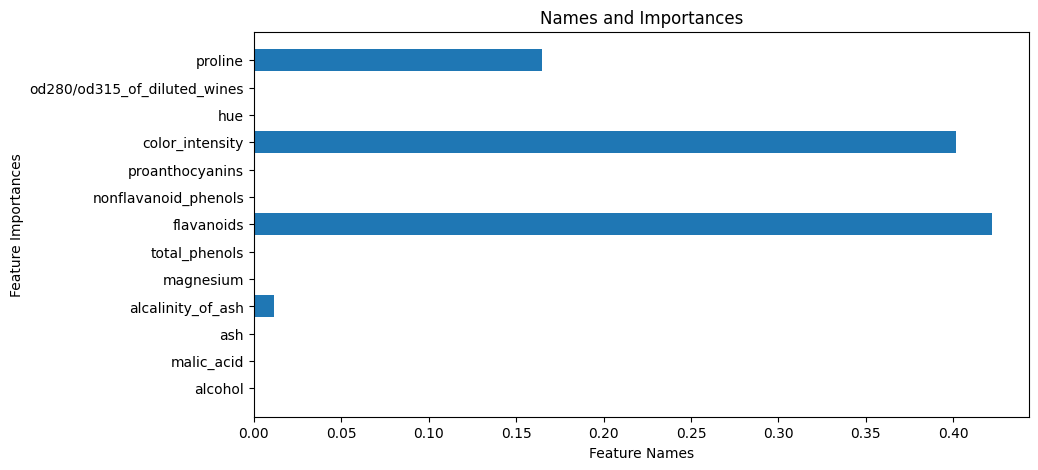

In [19]:
### your code here
importances = gridSearch.best_estimator_.feature_importances_
feature_names = data.feature_names
print("Feature Importances")
for importance, name in zip(importances, feature_names):
  if importance != 0:
    print(f"Name:{name} Importance:{importance}")

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Names")
plt.ylabel("Feature Importances")
plt.title("Names and Importances")

Step 3: Visualize the best decision tree classifier using "plot_tree" function, use the appropriate feature and class names (using feature_names and class_names argument) and title.

(4 points)

Text(0.5, 1.0, 'Best Decision Tree')

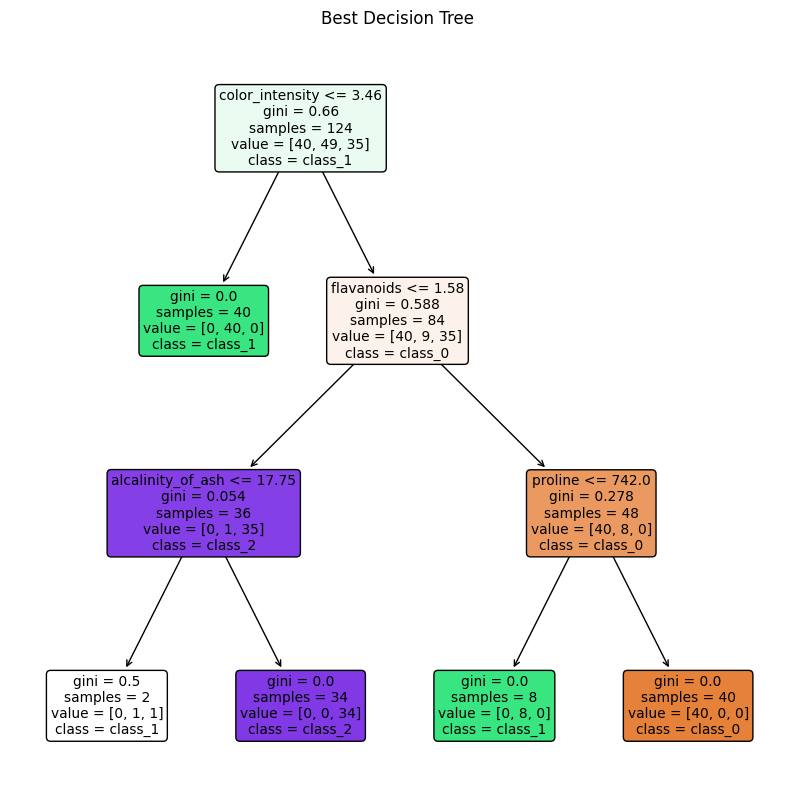

In [20]:
### your code here
plt.figure(figsize=(10,10))
plot_tree(gridSearch.best_estimator_,feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Best Decision Tree")

Step 4: Make predictions using the best classifier and print evaluation metrics:

accuracy, weighted precision, weighted recall, and weighted f1-score.

(4 points)

In [21]:
### your code here
best_tree = gridSearch.best_estimator_
decision_tree_pred = best_tree.predict(X_test)

print(f"Acc Score: {accuracy_score(y_test, decision_tree_pred)}")
print(f"Weighted Precision: {precision_score(y_test, decision_tree_pred, average='weighted')}")
print(f"Weighted Recall: {recall_score(y_test, decision_tree_pred, average='weighted')}")
print(f"Weighted F1-Score: {f1_score(y_test, decision_tree_pred, average='weighted')}")

Acc Score: 0.9444444444444444
Weighted Precision: 0.9473775017253276
Weighted Recall: 0.9444444444444444
Weighted F1-Score: 0.9443758573388202


## Task 3: Random Forest Classifier

In [22]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# DO NOT MODIFY this cell, just run it!

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=101)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


Step 1: In this step, you will implement random forest manually using DecisionTreeClassifier. Complete the below function "fit_random_forest_manual". The function should return a list of trained estimators (decision tree classifiers).

Use max_samples to randomly sample (with replacement) the specified fraction of the data to fit the decision tree model.

**NOTE:** use random_state argument when creating the DecisionTreeClassifier

(12 points)

In [23]:
def fit_random_forest_manual(X, y, n_estimators=100, max_depth=None, max_samples=0.75, random_state=None):
    trained_estimators = []
    np.random.seed(seed=random_state)

    for _ in range(n_estimators):
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
        indices = np.random.choice(len(X), size=int(len(X) * max_samples), replace=True)
        X_train = X[indices]
        y_train = y[indices]
        trained_estimators.append(model.fit(X_train, y_train))
    return(trained_estimators)

Step 2: Complete the below function "predict_random_forest_manual". This function should make predictions using each estimator trained in the previous step and use majority voting to get and return the final prediction.

(8 points)

In [24]:
def predict_random_forest_manual(estimators, X):
  predictions = [model.predict(X) for model in estimators]
  counts = []
  uniques = np.unique(predictions)
  for u in uniques:
    counts.append(np.sum(predictions == u))
  return uniques[counts.index(max(counts))]



Step 3: Train the manually implemented Random Forest and the scikit-learn implementation both with the following parameters: n_estimators=1000, max_depth=5, max_samples=0.75, random_state=101

Then print the accuracy score from both the manual and scikit-learn implementation.

(8 points)

In [25]:
#sklearn
randForest = RandomForestClassifier(n_estimators = 1000, max_depth=5, max_samples=0.75, random_state=101)
randForest.fit(X_train, y_train)
rfPred = randForest.predict(X_test)
print(f"Acc Score SkLearn = {accuracy_score(y_test, rfPred)}")

#mine
mine = fit_random_forest_manual(X_train, y_train, n_estimators = 1000, max_depth=5, max_samples=0.75, random_state=101)
my_pred = [predict_random_forest_manual(mine, [i]) for i in X_test]
print(f"Acc Score Mine = {accuracy_score(y_test, my_pred)}")

Acc Score SkLearn = 0.935
Acc Score Mine = 0.93


## Task 4: Gradient Boosting Classifier

In [26]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



Step 1: In this step, you will implement the gradient boosting classifier manually. Complete the below function "fit_gradient_boosting_manual" using the below formula as reference. The function should return a list of all the trained decision tree models.

(18 points)

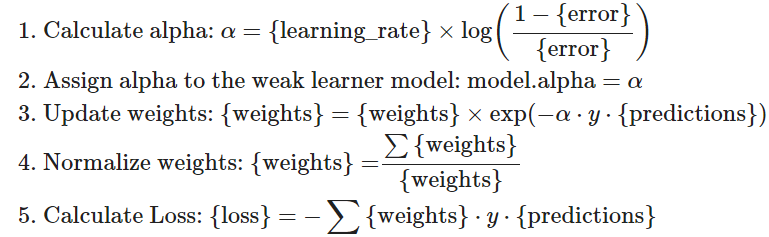

In [27]:
def fit_gradient_boosting_manual(X, y, n_estimators=100, learning_rate=0.1, tol=1e-4, n_iter_no_change=None, random_state=101):
    m = X.shape[0]
    weights = np.ones(m) / m
    models = []

    prev_loss = np.inf
    no_change_count = 0

    for _ in range(n_estimators):
        model = DecisionTreeClassifier(max_depth=3, random_state=random_state)
        model.fit(X, y, weights)

        predictions = model.predict(X)
        error = np.sum(weights * (predictions != y)) / np.sum(weights)

        ###### your code here #######
        alpha = learning_rate * np.log((1-error)/error)
        model.alpha=alpha
        weights = weights * np.exp(-1 * alpha * y * predictions)
        weights = np.sum(weights)/weights
        loss = -1*(np.sum(weights * y * predictions))
        #########################

        models.append(model)

        if prev_loss - loss < tol:
            no_change_count += 1
            if n_iter_no_change is not None and no_change_count >= n_iter_no_change:
                break
        else:
            no_change_count = 0

        prev_loss = loss

    return models


Step 2: Complete the below function "predict_gradient_boosting_manual". The function should iterate over the returned models from the previous step and accumulate predictions by multiplying the prediction from each model with the model's alpha value. Finally use the "sign" function on the predictions array and return it.

(7 points)

Sign function: Determines the sign of a number. Returns 1 if the number is positive, zero (0) if the number is 0, and -1 if the number is negative.

In [28]:
def predict_gradient_boosting_manual(models, X):
  ### your code here
  preds = np.zeros(X.shape[0])

  for model in models:
    preds += (model.alpha * model.predict(X))
  preds = np.sign(preds)
  return preds

In [29]:
# DO NOT MODIFY this cell, just run it!

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=101)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Step 3: Train the manually implemented Gradient Boosting classifier and the scikit-learn implementation both with the following parameters: n_estimators=100, learning_rate=0.1, tol=1e-4, n_iter_no_change=5, random_state=101

Then print the accuracy score from both the manual and scikit-learn implementation.

(6 points)

In [30]:
### your code here
gradBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, tol = 1e-4, n_iter_no_change=5, random_state = 101)
gradBoosting.fit(X_train, y_train)
gbPred = gradBoosting.predict(X_test)
print(f"Acc Grad Boost: {accuracy_score(y_test, gbPred)}")

mine = fit_gradient_boosting_manual(X_train, y_train, n_estimators = 100, learning_rate = 0.1, tol = 1e-4, n_iter_no_change=5, random_state = 101)
my_pred = predict_gradient_boosting_manual(mine, X_test)
print(f"Acc My Grad Boosting: {accuracy_score(y_test, my_pred)}")


Acc Grad Boost: 0.95
Acc My Grad Boosting: 0.9466666666666667


## Task 5: Naive Bayes

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, 0:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Step 1: Train the GaussianNB classifier using X_train, evaluate using X_test and print the accuracy score.

(5 points)

In [32]:
### your code here
gausModel = GaussianNB()
gausModel.fit(X_train, y_train)
pred = gausModel.predict(X_test)
print(f"Acc for Gaus Model: {accuracy_score(y_test, pred)}")


Acc for Gaus Model: 0.7555555555555555


Step 2: Visualize the decision boundary of the trained GaussianNB model. You can refer to the plot_decision_boundary from Task 1 (kernel SVM) to do this.

(6 points)

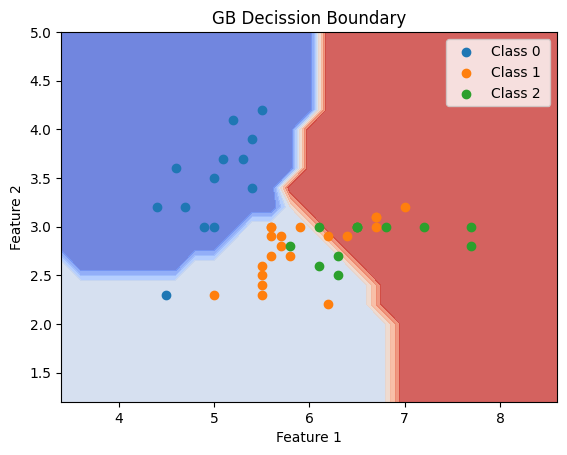

In [33]:
def plot_decision_boundary(X, y, ax, clf, gamma, title):
    h = .2  # Step size in the meshgrid

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    for u in np.unique(y):
      ax.scatter(X[y == u][:, 0], X[y == u][:, 1], label=f'Class {u} ', marker='o')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    plt.legend()
    plt.show()
fig,ax=plt.subplots()
plot_decision_boundary(X=X_test, y=y_test, ax=ax, clf=gausModel, gamma = None, title= "GB Decission Boundary")